2025-12-05 04:20:29,080 - INFO - Loading data from ../data/raw/network_data.csv


🧠 Starting In-Depth Model Analysis...
✅ Loaded model: RandomForestClassifier


2025-12-05 04:20:29,374 - INFO - Loaded 100655 records with 42 features
2025-12-05 04:20:29,375 - INFO - Preprocessing data
2025-12-05 04:20:29,404 - INFO - Encoded 11 target classes
2025-12-05 04:20:29,559 - INFO - Preprocessed 100655 samples with 41 features


🔮 Generating predictions on full dataset...

📊 1. Confusion Matrix (Where does the model fail?)


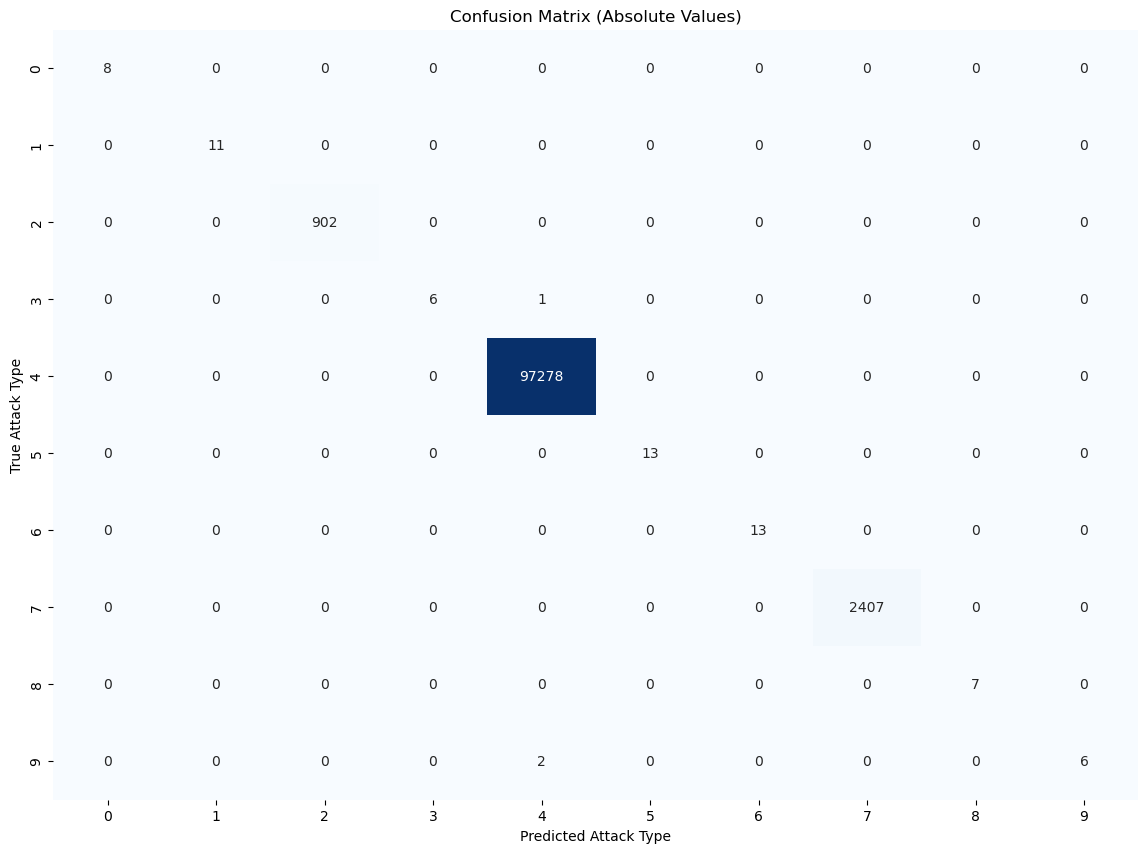


🌟 2. Feature Importance (What reveals the attack?)


/tmp/ipykernel_254209/538592556.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


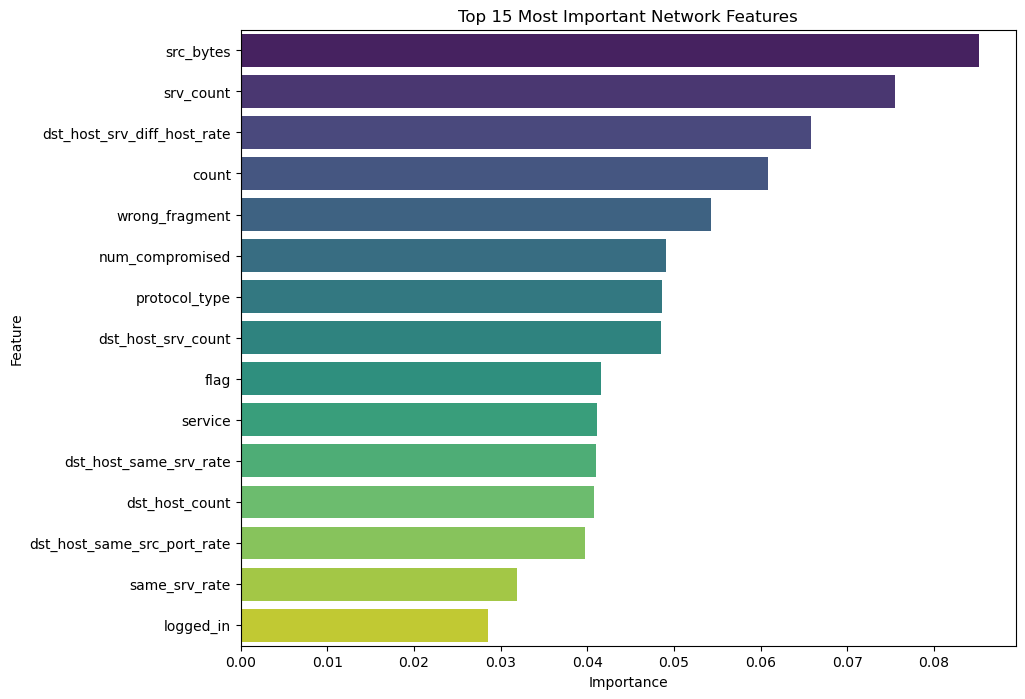

💡 Insight: The top features are the primary indicators used by the AI to detect intrusions.
✅ Analysis Complete.


In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import numpy as np

# 1. Import from main.py
sys.path.append(os.path.abspath('..'))
from main import load_data, preprocess_data
from sklearn.metrics import confusion_matrix, classification_report

print("🧠 Starting In-Depth Model Analysis...")

# 2. Load the BEST model (Random Forest from the previous step)
model_path = '../models/best_model_rf.pkl'
if not os.path.exists(model_path):
    print(f"❌ Error: Model not found at {model_path}. Run 02_Baseline_Models.ipynb first.")
else:
    model = joblib.load(model_path)
    print(f"✅ Loaded model: {type(model).__name__}")

# 3. Load and Preprocess Data (Fresh copy)
data_path = "../data/raw/network_data.csv"
df = load_data(data_path)
# We fit=True here to simulate the training environment for analysis
X, y, artifacts = preprocess_data(df, fit=True) 

# Filter rare classes (Same logic as before to avoid errors)
valid_classes = y.value_counts()[y.value_counts() >= 2].index
mask = y.isin(valid_classes)
X = X[mask]
y = y[mask]

# 4. Generate Predictions
print("🔮 Generating predictions on full dataset...")
y_pred = model.predict(X)

# ---------------------------------------------------------
# VISUALIZATION 1: CONFUSION MATRIX
# ---------------------------------------------------------
print("\n📊 1. Confusion Matrix (Where does the model fail?)")
plt.figure(figsize=(14, 10))
cm = confusion_matrix(y, y_pred)
# Normalize to see percentages (Optional, but helpful for imbalanced data)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Absolute Values)')
plt.ylabel('True Attack Type')
plt.xlabel('Predicted Attack Type')
plt.show()

# ---------------------------------------------------------
# VISUALIZATION 2: FEATURE IMPORTANCE
# ---------------------------------------------------------
print("\n🌟 2. Feature Importance (What reveals the attack?)")

if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    feature_names = X.columns
    
    # Create a DataFrame for plotting
    fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    fi_df = fi_df.sort_values(by='Importance', ascending=False).head(15) # Top 15 features
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
    plt.title('Top 15 Most Important Network Features')
    plt.show()
    
    print("💡 Insight: The top features are the primary indicators used by the AI to detect intrusions.")
else:
    print("⚠️ This model type does not support feature importance (e.g., Logistic Regression).")

print("✅ Analysis Complete.")